In [1]:
from facenet_pytorch import MTCNN

In [2]:
import cv2 
from PIL import Image
import numpy as np 
from matplotlib import pyplot as plt 
from tqdm.notebook import tqdm
import matplotlib.image as mpimg

In [3]:
os.getcwd()

'x:\\bangkit-project\\ml-project'

(numpy.ndarray, (360, 640, 3))

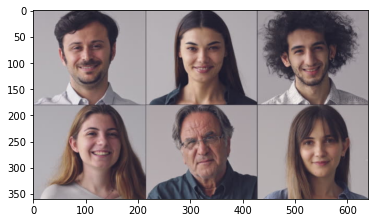

In [4]:
mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device='cuda:0')
image = "test_image/6_faces.jpg"
image = mpimg.imread(image)
# image = Image.fromarray(image)
plt.imshow(image)
type(image), image.shape

<ipython-input-34-013b482885e6>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


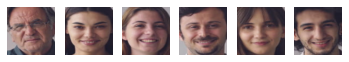

In [34]:
# Detect face 



# Visualize
fig, axes = plt.subplots(1, len(faces))
for face, ax in zip(faces, axes):
    ax.imshow(face.permute(1, 2, 0).int().numpy())
    ax.axis('off')
fig.show()

In [5]:
faces = mtcnn(image)

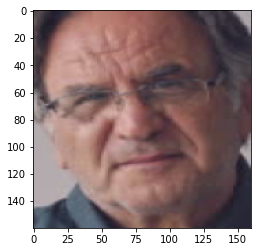

In [7]:
list_of_faces = []
for face in faces:
    face_array = face.permute(1, 2, 0).int().numpy()
    list_of_faces.append(face_array)

image_1 = list_of_faces[0]
plt.imshow(image_1)


In [36]:
image_1

array([[[ 81,  71,  72],
        [ 82,  72,  73],
        [ 83,  74,  75],
        ...,
        [172, 163, 166],
        [172, 163, 166],
        [172, 163, 166]],

       [[ 85,  73,  75],
        [ 85,  74,  76],
        [ 85,  75,  78],
        ...,
        [169, 162, 164],
        [171, 164, 166],
        [172, 165, 167]],

       [[ 87,  75,  78],
        [ 86,  75,  78],
        [ 85,  74,  78],
        ...,
        [167, 161, 163],
        [170, 164, 166],
        [171, 165, 167]],

       ...,

       [[ 68,  78,  94],
        [ 73,  83, 100],
        [ 80,  92, 108],
        ...,
        [ 39,  38,  52],
        [ 39,  38,  52],
        [ 39,  38,  52]],

       [[ 74,  85, 102],
        [ 79,  90, 107],
        [ 86,  99, 115],
        ...,
        [ 39,  38,  52],
        [ 39,  38,  52],
        [ 39,  38,  52]],

       [[ 76,  92, 108],
        [ 80,  96, 112],
        [ 86, 103, 119],
        ...,
        [ 38,  37,  51],
        [ 38,  37,  51],
        [ 38,  37,  51]]

In [37]:
image_to_write = cv2.cvtColor(image_1, cv2.COLOR_BGRA2RGB)

error: OpenCV(4.5.2) c:\users\runneradmin\appdata\local\temp\pip-req-build-kuwfz3h3\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x4f6b44ce::Set<3,4,-1>,struct cv::impl::A0x4f6b44ce::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)


In [45]:
img2 = cv2.imread(image_1)

TypeError: Can't convert object of type 'numpy.ndarray' to 'str' for 'filename'

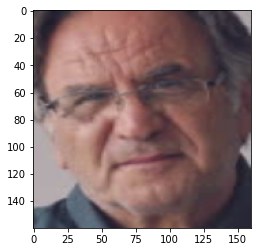

In [70]:
# image_1 is one of face 

from matplotlib import pyplot as plt 
from PIL import Image 

# Use PIL instead of cv2. 
image = Image.fromarray((image_1).astype(np.uint8))
plt.imshow(image)
image.save("test.jpg")

with open(image, 'w') as file:
    print()
"""
PredictFace(face: Image.fromarray) -> dict

for face in faces:
    - face = ToArray(face)
    - data = PredictFace(face)
    - blobUrl = UploadFaceToBucket(face)
    - InsertDataToDB(data, blobURL)
"""

In [74]:
mtcnn(image, save_path='test.jpg')

tensor([[[[ 81.,  82.,  83.,  ..., 172., 172., 172.],
          [ 85.,  85.,  85.,  ..., 169., 171., 172.],
          [ 88.,  87.,  85.,  ..., 167., 169., 171.],
          ...,
          [ 69.,  74.,  81.,  ...,  39.,  39.,  39.],
          [ 75.,  79.,  87.,  ...,  39.,  39.,  39.],
          [ 76.,  80.,  86.,  ...,  38.,  38.,  38.]],

         [[ 71.,  72.,  74.,  ..., 163., 163., 163.],
          [ 73.,  73.,  75.,  ..., 162., 164., 165.],
          [ 76.,  75.,  74.,  ..., 161., 163., 165.],
          ...,
          [ 78.,  84.,  93.,  ...,  38.,  38.,  38.],
          [ 86.,  91., 100.,  ...,  38.,  38.,  38.],
          [ 92.,  97., 103.,  ...,  37.,  37.,  37.]],

         [[ 72.,  73.,  75.,  ..., 166., 166., 166.],
          [ 75.,  76.,  78.,  ..., 165., 166., 167.],
          [ 78.,  78.,  78.,  ..., 163., 165., 167.],
          ...,
          [ 95., 101., 109.,  ...,  52.,  52.,  52.],
          [102., 108., 116.,  ...,  52.,  52.,  52.],
          [108., 113., 119.,  ...

In [1]:
from model_architecture import * 
import os 
import cv2
import mtcnn
import pickle 
import numpy as np 
from sklearn.preprocessing import Normalizer
from tensorflow.keras.models import load_model
import tensorflow as tf

tf.__version__

'2.4.1'

In [2]:
tf.config.set_visible_devices([], 'GPU')

In [3]:
face_data = 'image/'
required_shape = (160,160)
face_encoder = InceptionResNetV2()
path = "model/facenet_keras_weights.h5"
face_encoder.load_weights(path)
face_detector = mtcnn.MTCNN() 
encodes = []
encoding_dict = dict()
l2_normalizer = Normalizer('l2')

In [4]:
def normalize(img):
    mean, std = img.mean(), img.std()
    return (img - mean) / std

In [5]:
for face_names in os.listdir(face_data):
    person_dir = os.path.join(face_data,face_names)

    for image_name in os.listdir(person_dir):
        image_path = os.path.join(person_dir,image_name)

        img_BGR = cv2.imread(image_path)
        img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

        # GETTING THE FACE ONLY 
        x = face_detector.detect_faces(img_RGB)
        x1, y1, width, height = x[0]['box']
        x1, y1 = abs(x1) , abs(y1)
        x2, y2 = x1+width , y1+height
        face = img_RGB[y1:y2 , x1:x2]
        
        # NORMALIZE THE DATA AND DO PREDICTION AND ENCODING
        face = normalize(face)
        face = cv2.resize(face, required_shape)
        face_d = np.expand_dims(face, axis=0)
        encode = face_encoder.predict(face_d)[0]
        encodes.append(encode)

    if encodes:
        encode = np.sum(encodes, axis=0 )
        encode = l2_normalizer.transform(np.expand_dims(encode, axis=0))[0]
        encoding_dict[face_names] = encode

In [8]:
path = 'encodings.pkl'
with open(path, 'wb') as file:
    pickle.dump(encoding_dict, file)

In [10]:
list_of_faces[0]

array([[[ 81,  71,  72],
        [ 82,  72,  73],
        [ 83,  74,  75],
        ...,
        [172, 163, 166],
        [172, 163, 166],
        [172, 163, 166]],

       [[ 85,  73,  75],
        [ 85,  73,  76],
        [ 85,  75,  78],
        ...,
        [169, 162, 165],
        [171, 164, 166],
        [172, 165, 167]],

       [[ 88,  76,  78],
        [ 87,  75,  78],
        [ 85,  74,  78],
        ...,
        [167, 161, 163],
        [169, 163, 165],
        [171, 165, 167]],

       ...,

       [[ 69,  78,  95],
        [ 74,  84, 101],
        [ 81,  93, 109],
        ...,
        [ 39,  38,  52],
        [ 39,  38,  52],
        [ 39,  38,  52]],

       [[ 75,  86, 102],
        [ 79,  91, 108],
        [ 87, 100, 116],
        ...,
        [ 39,  38,  52],
        [ 39,  38,  52],
        [ 39,  38,  52]],

       [[ 76,  92, 108],
        [ 80,  97, 113],
        [ 86, 103, 119],
        ...,
        [ 38,  37,  51],
        [ 38,  37,  51],
        [ 38,  37,  51]]

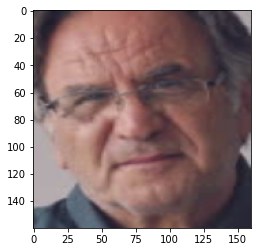

In [11]:
image_1=list_of_faces[0]
image = Image.fromarray((image_1).astype(np.uint8))
plt.imshow(image)

In [12]:
type(image_1)

numpy.ndarray

In [15]:
im = cv2.imread("X:/bangkit-project/ml-project/test_image/yusril1.jpeg")
img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
type(img)

numpy.ndarray